In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
train_df= pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train = train_df.copy()
test= test_df.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#remover dados que não são relevantes

In [10]:
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace= True)

#preencher os campos nulos com média, mediana ou moda, de acordo com o tipo

In [11]:
train['Age'].median()

28.0

In [12]:
train['Embarked'].mode()[0]

'S'

In [13]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [14]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
test['Age'].median()

27.0

In [16]:
test['Fare'].median()

14.4542

In [17]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [18]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### value_counts() informa a quantidade de valores únicos

In [19]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
train['Embarked'].value_counts()
#S = SouthHampton C = Chernbourg Q =Queenstown

S    646
C    168
Q     77
Name: Embarked, dtype: int64

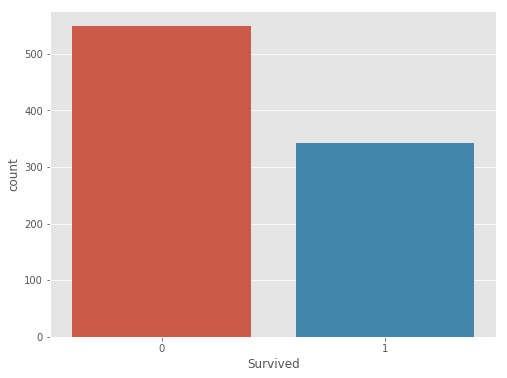

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data= train)

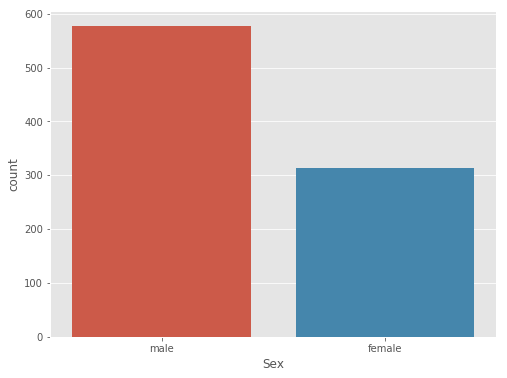

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data= train)

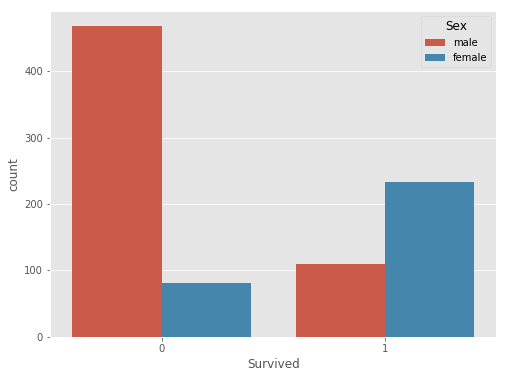

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data= train)

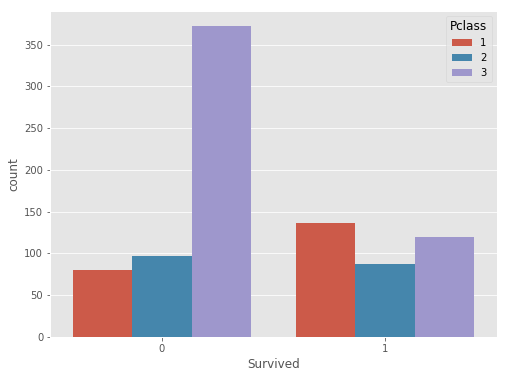

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Pclass', data= train)

In [27]:
#verificar a existência de outliers

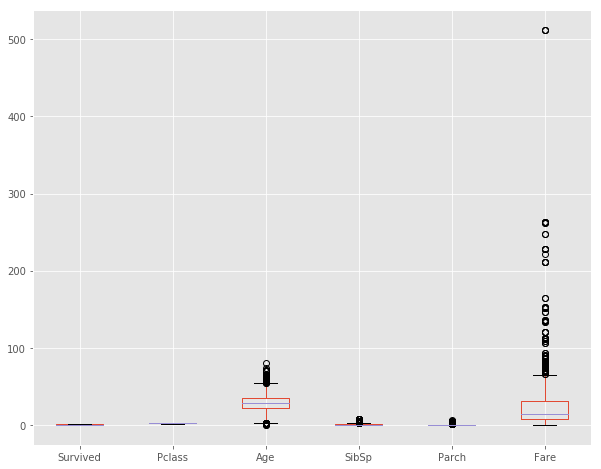

In [28]:
train.plot(kind='box', figsize= (10,8))

In [29]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']

train[cols]= train[cols].clip(lower= train[cols].quantile(0.15), upper= train[cols].quantile(0.85), axis=1)

train.drop(columns=['Parch'], axis=1, inplace=True)

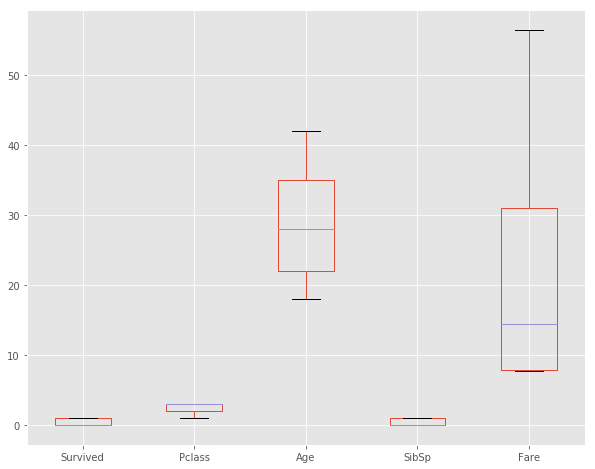

In [30]:
train.plot(kind='box', figsize= (10,8)) 

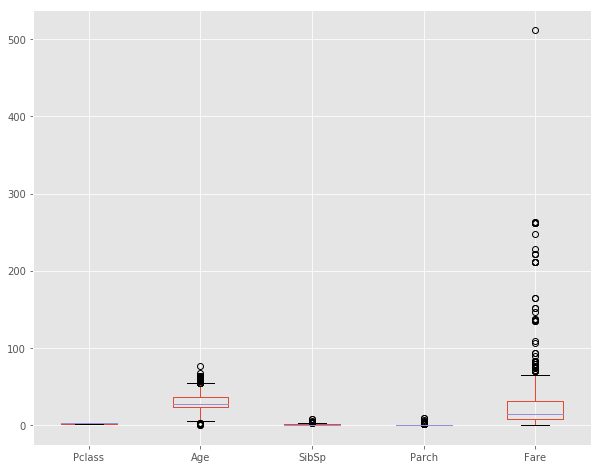

In [31]:
test.plot(kind='box', figsize= (10,8))

In [32]:
test[cols]= test[cols].clip(lower= test[cols].quantile(0.15), upper= test[cols].quantile(0.85), axis=1)

test.drop(columns=['Parch'], axis=1, inplace=True)

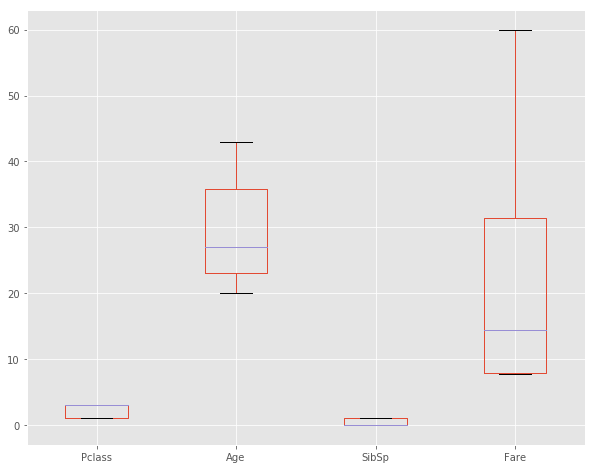

In [33]:
test.plot(kind='box', figsize= (10,8))  

In [34]:
train= pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

test= pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked' ], drop_first= True)

In [35]:
train.head(40)

,Survived,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,7.7500,0,1,1,0,1
1,1,38.0,1,56.4958,0,0,0,0,0
2,1,26.0,0,7.9250,0,1,0,0,1
3,1,35.0,1,53.1000,0,0,0,0,1
4,0,35.0,0,8.0500,0,1,1,0,1
5,0,28.0,0,8.4583,0,1,1,1,0
6,0,42.0,0,51.8625,0,0,1,0,1
7,0,18.0,1,21.0750,0,1,1,0,1
8,1,27.0,0,11.1333,0,1,0,0,1
9,1,18.0,1,30.0708,1,0,0,0,0


In [36]:
test.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,7.8292,0,1,1,1,0
1,43.0,1,7.7500,0,1,0,0,1
2,43.0,0,9.6875,1,0,1,1,0
3,27.0,0,8.6625,0,1,1,0,1
4,22.0,1,12.2875,0,1,0,0,1


#### separando a base de dados

In [37]:
X_train= train.iloc[:, 1:]
y_train= train['Survived'].values.reshape(-1,1)

X_test= test

#### O escalonamento de recurso é usado para padronizar as variáveis independentes presentes nos dados em um intervalo fixo.

In [38]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler() 
#implementa a TransformerAPI para calcular a média e o desvio padrão em um conjunto de treinamento,
#de modo a poder reaplicar posteriormente a mesma transformação no conjunto de teste.
#Tem a ver com padronização. 

In [39]:
features= ['Age', 'SibSp', 'Fare'] 

X_train[features]= ss.fit_transform(X_train[features])
X_test[features]= ss.fit_transform(X_test[features])
#o método de ajuste (FIT), quando aplicado ao conjunto de dados de treinamento,
#aprende os parâmetros do modelo (por exemplo, média e desvio padrão). 
#Em seguida, precisamos aplicar o método de transformação no conjunto de dados de treinamento
#para obter o conjunto de dados de treinamento transformado (em escala). 
#Também podemos executar essas duas etapas em uma etapa aplicando fit_transform no conjunto de dados de treinamento.

In [40]:
X_train.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.865086,1.465746,-0.853616,0,1,1,0,1
1,1.123252,1.465746,1.876088,0,0,0,0,0
2,-0.368001,-0.682247,-0.843816,0,1,0,0,1
3,0.750438,1.465746,1.685928,0,0,0,0,1
4,0.750438,-0.682247,-0.836817,0,1,1,0,1


In [41]:
X_test.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.660130,-0.690675,-0.830005,0,1,1,1,0
1,1.731843,1.447859,-0.834124,0,1,0,0,1
2,1.731843,-0.690675,-0.733364,1,0,1,1,0
3,-0.285498,-0.690675,-0.786669,0,1,1,0,1
4,-0.915918,1.447859,-0.598151,0,1,0,0,1


In [42]:
from sklearn.linear_model import LogisticRegression

clf= LogisticRegression()

clf.fit(X_train, y_train.ravel())

predictions= clf.predict(X_test)

In [43]:
clf.score(X_train, y_train)

0.7912457912457912

In [44]:
submission= pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived': predictions })

print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [45]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
filename= 'titanic predictions.csv'
submission.to_csv(filename, index=False)

In [ ]:
#To improve your score, you need to try with other algorithms like support vector machine, decision trees, random forest, XGboost, etc. In the chosen algorithm, try to find best parameters with the help of Grid Search or Random Search to improve your accuracy.
#Note : You need to clean your data properly because some algorithms get affected with outliers, Imbalanced datasets. You need to consider all those aspects.